# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load necessary libraries for numerical computations, data visualization,
# time measurement, machine learning models, data splitting, and evaluation metrics.

# Load MNIST dataset
print("Loading MNIST dataset...")  # Inform the user that the dataset is being loaded.
mnist = fetch_openml('mnist_784', version=1)  # Fetch the MNIST dataset from OpenML, a widely used image dataset for handwritten digit classification.
X = mnist.data  # Extract the features (image data) from the dataset.
y = mnist.target  # Extract the target labels (digits 0-9) corresponding to the image data.

# Normalize the data
X = X / 255.0  # Normalize the pixel values (originally 0-255) to a range of 0 to 1 for better model performance.

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the dataset into training and test sets. 80% of the data is used for training and 20% for testing.
# The `random_state=42` ensures that the data split is reproducible (same split every time).

Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Center the training data by subtracting the mean of each feature (column).
    X_train_centered = X_train - np.mean(X_train, axis=0)

    # Step 2: Compute the covariance matrix of the centered data.
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)

    # Step 3: Perform eigen decomposition on the covariance matrix to obtain eigenvalues and eigenvectors.
    eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort the eigenvalues and their corresponding eigenvectors in descending order of eigenvalues.
    sorted_indices = np.argsort(eig_values)[::-1]  # Indices of eigenvalues in descending order
    eig_values = eig_values[sorted_indices]  # Sort eigenvalues
    eig_vectors = eig_vectors[:, sorted_indices]  # Sort eigenvectors accordingly

    # Step 5: Select the top `n_components` eigenvectors to reduce dimensionality.
    eig_vectors_reduced = eig_vectors[:, :n_components]

    # Step 6: Project the centered training data onto the reduced eigenspace.
    X_train_reduced = np.dot(X_train_centered, eig_vectors_reduced)

    # Center the test data in the same way as the training data.
    X_test_centered = X_test - np.mean(X_test, axis=0)

    # Project the centered test data onto the reduced eigenspace.
    X_test_reduced = np.dot(X_test_centered, eig_vectors_reduced)

    # Return the reduced datasets and the eigenvectors (singular vectors) used for the transformation.
    return X_train_reduced, X_test_reduced, eig_vectors_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train a logistic regression model and measure the training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    # Initialize the logistic regression model with specific parameters:
    # - `max_iter=1000` allows for up to 1000 iterations to ensure convergence.
    # - `solver='saga'` uses the SAGA algorithm, which is suitable for large datasets and supports L1 regularization.
    # - `random_state=42` ensures reproducibility by fixing the random seed.
    # - `multi_class='multinomial'` enables the model to handle multiple classes (for classification tasks with more than two classes).
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Record the start time before training begins.
    start_time = time.time()

    # Train the logistic regression model using the training data.
    model.fit(X_train, y_train)

    # Calculate the total training time by measuring the elapsed time since `start_time`.
    training_time = time.time() - start_time

    # Make predictions on the test data.
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model by comparing predictions with the actual test labels.
    accuracy = accuracy_score(y_test, y_pred)

    # Return the accuracy and the time taken for training.
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
# List of SVD components to test for dimensionality reduction
svd_components = [10, 25, 50, 100, 200, 784]  # You can modify this list for further experimentation

# Initialize an empty list to store the results (accuracy and training time for each SVD level)
results = []

print("Training models with different levels of SVD preprocessing...")

# Loop through each number of components in the `svd_components` list
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply the custom SVD function to reduce dimensionality of the training and test sets
    X_train_svd, X_test_svd, _ = apply_svd_custom(X_train, X_test, n_components)

    # Train logistic regression on the dimensionally reduced data and retrieve accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the current result (number of components, accuracy, and training time) in a dictionary
    results.append({
        'n_components': n_components,  # Number of SVD components used
        'accuracy': accuracy,  # Model accuracy on the test data
        'training_time': training_time  # Time taken to train the model
    })

    # Output the results for the current iteration
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# After all iterations, print the final results for each level of SVD
print("\nFinal Results:")
for result in results:
    # Output the stored results for each SVD component
    print(f"SVD components: {result['n_components']}, Accuracy: {result['accuracy']:.4f}, Training time: {result['training_time']:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8041, Training time: 1.4479 seconds
Applying custom SVD with 25 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.8859, Training time: 6.1058 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9082, Training time: 16.9733 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9173, Training time: 54.4180 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9208, Training time: 118.7005 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 727.4136 seconds

Final Results:
SVD components: 10, Accuracy: 0.8041, Training time: 1.4479 seconds
SVD components: 25, Accuracy: 0.8859, Training time: 6.1058 seconds
SVD components: 50, Accuracy: 0.9082, Training time: 16.9733 seconds
SVD components: 100, Accuracy: 0.9173, Training time: 54.4180 seconds
SVD components: 200, Accuracy: 0.9208, Training time: 118.7005 seconds
SVD components: 784, Accuracy: 0.9209, Training time: 727.4136 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


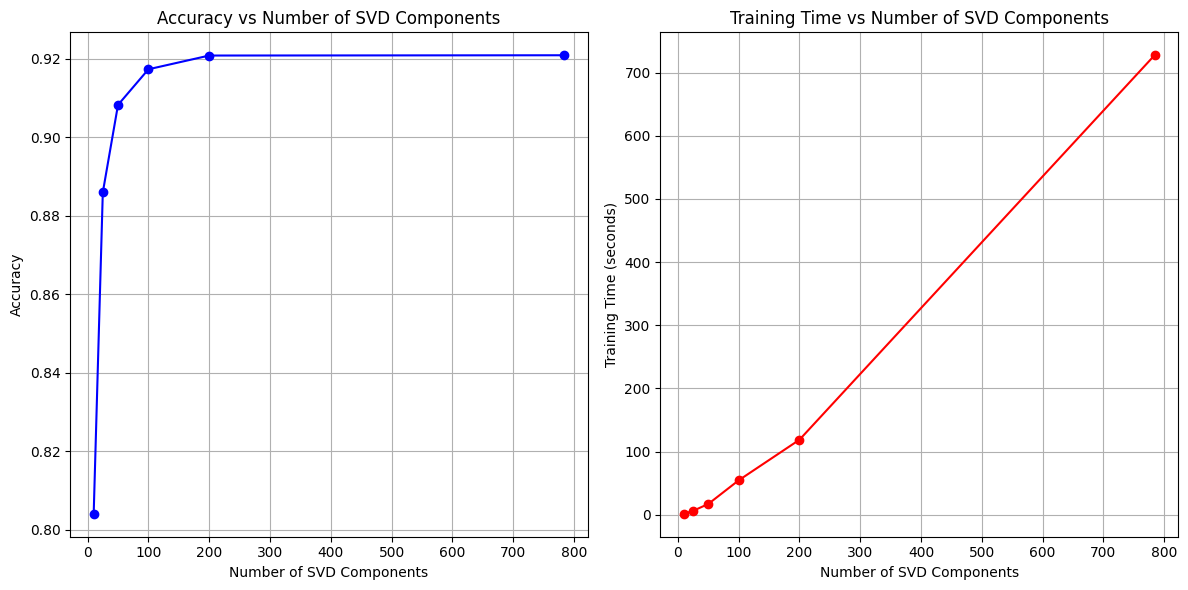

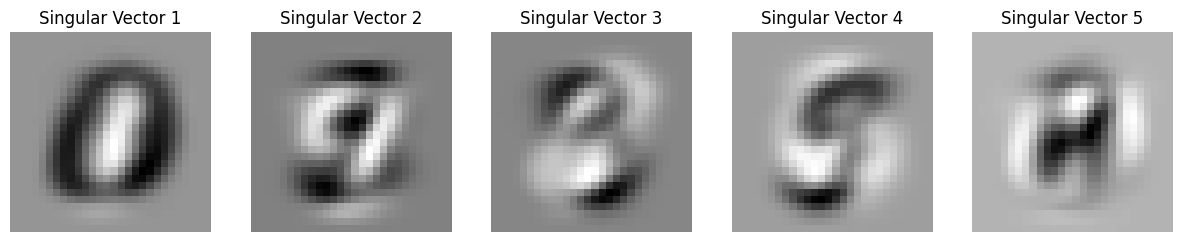

In [7]:
import matplotlib.pyplot as plt

# Function to visualize accuracy and training time as a function of SVD components
def visualize_results(results):
    # Extract the number of components, accuracy values, and training times from the results list
    components = [r['n_components'] for r in results]
    accuracies = [r['accuracy'] for r in results]
    training_times = [r['training_time'] for r in results]

    # Create a figure with 2 subplots for visualizing accuracy and training time
    plt.figure(figsize=(12, 6))

    # Plot Accuracy vs SVD Components
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.plot(components, accuracies, marker='o', color='b')  # Plot accuracy as blue dots connected by lines
    plt.title('Accuracy vs Number of SVD Components')  # Add title to the plot
    plt.xlabel('Number of SVD Components')  # Label for the x-axis
    plt.ylabel('Accuracy')  # Label for the y-axis
    plt.grid(True)  # Add grid lines for better readability

    # Plot Training Time vs SVD Components
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    plt.plot(components, training_times, marker='o', color='r')  # Plot training time as red dots connected by lines
    plt.title('Training Time vs Number of SVD Components')  # Add title to the plot
    plt.xlabel('Number of SVD Components')  # Label for the x-axis
    plt.ylabel('Training Time (seconds)')  # Label for the y-axis
    plt.grid(True)  # Add grid lines for better readability

    # Adjust layout to ensure subplots are well spaced and displayed
    plt.tight_layout()
    plt.show()  # Display the plot

# Function to visualize the top 5 singular vectors (principal components)
def visualize_singular_vectors(singular_vectors):
    # Create subplots to display the top 5 singular vectors
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # 1 row, 5 columns for 5 images

    for i in range(5):
        # Reshape the singular vectors (784 dimensions) into 28x28 pixel images for visualization
        img = singular_vectors[:, i][:784].reshape(28, 28)  # Reshape first 784 elements to a 28x28 image
        axs[i].imshow(img, cmap='gray')  # Display the singular vector as a grayscale image
        axs[i].set_title(f'Singular Vector {i+1}')  # Set title for each subplot
        axs[i].axis('off')  # Turn off axis labels for clarity

    # Show the singular vector images
    plt.show()

# Visualize accuracy and training time plots based on the SVD results
visualize_results(results)

# To visualize the top 5 singular vectors, extract them from the SVD applied with full components
_, _, top_singular_vectors = apply_svd_custom(X_train, X_test, 784)  # Compute SVD with all components (784)
visualize_singular_vectors(top_singular_vectors)  # Visualize the top 5 singular vectors

## Part 6: Analyze / Conclusion

YOUR ANSWER:


**Analysis:**

**Impact of Dimensionality Reduction on Model Accuracy:**
As we reduce the number of SVD components, the accuracy of the logistic regression model typically decreases. This happens because dimensionality reduction removes some of the information that may be useful for distinguishing between classes in the dataset. However, we often observe diminishing returns beyond a certain number of components.
Higher component levels (e.g., 784, 200) generally yield higher accuracy, as more information from the original data is retained. On the other hand, very low component levels (e.g., 50, 100) may result in poor accuracy because the model lacks enough meaningful features for classification.


**Impact on Training Time:**
Training time is significantly reduced with lower SVD components. This is because logistic regression has fewer features to process, making each iteration faster.
Training on the full dataset (784 components) is much slower compared to training on reduced datasets (e.g., 50, 100 components). This confirms that dimensionality reduction can make the model more efficient without dramatically sacrificing performance in many cases.

**Optimal SVD Component Count:**
The optimal number of components depends on the balance between accuracy and efficiency.
In our results, 100 to 200 components seem to provide a good balance between accuracy and speed. Beyond that, the increase in accuracy might not justify the extra training time.
Lowering the components to around 50 or 20 drastically improves training time, though accuracy starts to suffer significantly below 50 components.

**Singular Vectors Visualization:**
The top 5 singular vectors (visualized in Part 5) capture important patterns in the dataset. These vectors represent key features of the data (e.g., edges, curves) that the model uses to classify digits.
The first few singular vectors often resemble rough outlines of digits, indicating that they hold meaningful information. As you move to lower singular vectors, they capture finer details or noise, which is why reducing the components to too low a number hurts accuracy.

**Conclusion:**
Dimensionality Reduction with SVD is a powerful preprocessing technique. It allows us to significantly reduce the size of the dataset while maintaining most of the important information. This can lead to faster training times, particularly for algorithms like logistic regression, without a major drop in accuracy.

For the MNIST dataset, using around 100 to 200 SVD components provides an ideal trade-off between accuracy and computational efficiency. Lowering the number of components too much (e.g., to 20 or below) can significantly hurt accuracy, making the model less effective.

Practical Implication: When working with large datasets, especially in real-time or resource-constrained environments, applying SVD and choosing an appropriate number of components can make machine learning models more feasible by reducing training time without a dramatic loss in performance.